In [9]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [16]:
symbols = [
    'IBM',
    'MSFT',
    'META',
    'INTC',
    'NEM',
    'AU',
    'AEM',
    'GFI'
]
data = yf.download(symbols, start="2020-01-01", end="2022-11-30")
portfolio_returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  8 of 8 completed


In [17]:
pca = PCA(n_components=3)
pca.fit(portfolio_returns)

PCA(n_components=3)

In [18]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_

(0.0, 100.0)

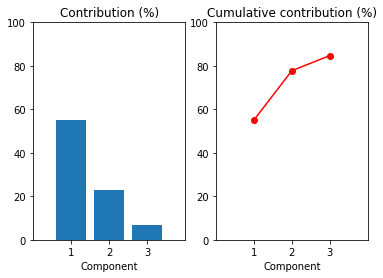

In [19]:
cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

In [20]:
X = np.asarray(portfolio_returns)

factor_returns = X.dot(pca_components.T)

factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"], 
    index=portfolio_returns.index,
    data=factor_returns
)

factor_returns.head()

,f1,f2,f3
Date,,,
2020-01-03 00:00:00-05:00,-0.011794,0.015824,-0.007090
2020-01-06 00:00:00-05:00,0.009480,-0.010078,-0.013161
2020-01-07 00:00:00-05:00,-0.006961,0.009891,-0.008298
2020-01-08 00:00:00-05:00,-0.074473,-0.031461,-0.002840
2020-01-09 00:00:00-05:00,-0.012221,-0.023795,-0.001387


<AxesSubplot: >

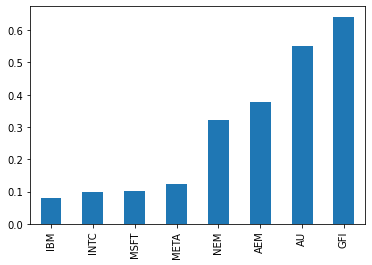

In [21]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"], 
    columns=portfolio_returns.columns,
    data = pca_components
).T

factor_exposures.f1.sort_values().plot.bar()

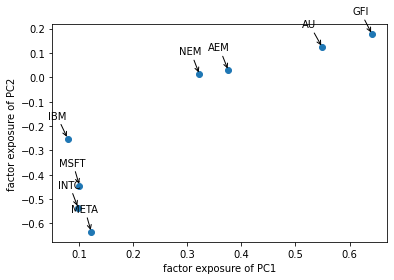

In [23]:
labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-20, 20),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', 
                        connectionstyle='arc3,rad=0'))